<a href="https://colab.research.google.com/github/dillonkoh89/GA-Capstone/blob/main/Capstone_Part_2_Object_Detection_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#pip install -q tensorflow==2.4.3
!pip install -q tflite-model-maker
!pip install -q pycocotools

     |████████████████████████████████| 616 kB 5.3 MB/s 
     |████████████████████████████████| 840 kB 31.5 MB/s 
     |████████████████████████████████| 1.1 MB 32.7 MB/s 
     |████████████████████████████████| 213 kB 50.7 MB/s 
     |████████████████████████████████| 1.1 MB 24.2 MB/s 
     |████████████████████████████████| 87 kB 6.8 MB/s 
     |████████████████████████████████| 596 kB 34.7 MB/s 
     |████████████████████████████████| 64 kB 2.6 MB/s 
     |████████████████████████████████| 6.3 MB 26.6 MB/s 
     |████████████████████████████████| 120 kB 36.7 MB/s 
     |████████████████████████████████| 1.2 MB 33.4 MB/s 
     |████████████████████████████████| 3.4 MB 35.7 MB/s 
     |████████████████████████████████| 25.3 MB 1.9 MB/s 
     |████████████████████████████████| 99 kB 8.6 MB/s 
     |████████████████████████████████| 352 kB 39.6 MB/s 
     |████████████████████████████████| 47.6 MB 76 kB/s 
     |████████████████████████████████| 208 kB 37.8 MB/s 


In [ ]:
import numpy as np
import os

from tflite_model_maker.config import ExportFormat
from tflite_model_maker import model_spec
from tflite_model_maker import object_detector

import tensorflow as tf
assert tf.__version__.startswith('2')

tf.get_logger().setLevel('ERROR')
from absl import logging
logging.set_verbosity(logging.ERROR)

In [ ]:
# This cell is using google drive as storage for the dataset
# mount drive
# from google.colab import drive
# drive.mount('/content/drive/')

# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
# !ln -s /content/drive/My\ Drive/ /mydrive

#list contents in your drive
# !ls /mydrive

In [ ]:
# downloading zipped datasets from dropbox
#!wget https://www.dropbox.com/s/tfiinu2n7sfp7cg/TFlite.zip #This is the old folder with just dataset before the below modelling is completed. This folder is removed due to dropbox size capacity
!wget https://www.dropbox.com/s/pdof6ef27bmvniu/TFlite.zip

--2021-12-03 15:25:51--  https://www.dropbox.com/s/pdof6ef27bmvniu/TFlite.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.85.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.85.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/pdof6ef27bmvniu/TFlite.zip [following]
--2021-12-03 15:25:52--  https://www.dropbox.com/s/raw/pdof6ef27bmvniu/TFlite.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucfa37d59db84180833faa243cfd.dl.dropboxusercontent.com/cd/0/inline/BbI64NB1T_yaN3TuKz_9iM5vSFzWbjQh51gRKEI1_ES4cnI6akDIE8dTAkslJGnsxo1IAh4xv6bp880ZuhiCEb_T_2h0MGqoFNViGc4ob1DKMdOkVghhvxDbSR_iIlnDvYWgP_AL_tvSwynR-nnk6mM_/file# [following]
--2021-12-03 15:25:53--  https://ucfa37d59db84180833faa243cfd.dl.dropboxusercontent.com/cd/0/inline/BbI64NB1T_yaN3TuKz_9iM5vSFzWbjQh51gRKEI1_ES4cnI6akDIE8dTAkslJGnsxo1IAh4xv6bp880ZuhiCEb_T_2h0MG

In [ ]:
import zipfile
import os
#extracting the files in the downloaded classification.zip file
zip_ref = zipfile.ZipFile("TFlite.zip")
zip_ref.extractall() #Extracts the files into the /tmp folder
zip_ref.close()

# Training Model with 10 percent of data

In [ ]:
%cd TFlite/
# Walk through the "10percent" data directory and list number of files
for dirpath, dirnames, filenames in os.walk("10percent"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

/content/TFlite
There are 3 directories and 0 images in '10percent'.
There are 2 directories and 0 images in '10percent/test'.
There are 0 directories and 4 images in '10percent/test/annotations'.
There are 1 directories and 5 images in '10percent/test/images'.
There are 0 directories and 0 images in '10percent/test/images/.ipynb_checkpoints'.
There are 2 directories and 0 images in '10percent/val'.
There are 0 directories and 16 images in '10percent/val/annotations'.
There are 0 directories and 16 images in '10percent/val/images'.
There are 2 directories and 0 images in '10percent/train'.
There are 0 directories and 80 images in '10percent/train/annotations'.
There are 0 directories and 80 images in '10percent/train/images'.


In [ ]:
# This cell is for walking the data directory when using google drive

# %cd /mydrive/TFlite
# Walk through the "10percent" data directory and list number of files
# for dirpath, dirnames, filenames in os.walk("10percent"):
#  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")



In [ ]:
# spec = model_spec.get('efficientdet_lite0')
spec = object_detector.EfficientDetLite0Spec(model_dir='log')

In [ ]:
#setting the path for creating the data using google drive
# train_image_dir = '/mydrive/TFlite/10percent/train/images'
# train_annot_dir = '/mydrive/TFlite/10percent/train/annotations'

# test_image_dir = '/mydrive/TFlite/10percent/test/images'
# test_annot_dir = '/mydrive/TFlite/10percent/test/annotations'

# val_image_dir = '/mydrive/TFlite/10percent/val/images'
# val_annot_dir = '/mydrive/TFlite/10percent/val/annotations'

#creating the train and test data 
# train_data = object_detector.DataLoader.from_pascal_voc(train_image_dir, train_annot_dir, label_map={1: "helmet", 2: "person", 3: 'safety vest'})
# test_data = object_detector.DataLoader.from_pascal_voc(test_image_dir, test_annot_dir, label_map={1: "helmet", 2: "person", 3: 'safety vest'})
# val_data = object_detector.DataLoader.from_pascal_voc(val_image_dir, val_annot_dir, label_map={1: "helmet", 2: "person", 3: 'safety vest'})

In [ ]:
#setting the path for creating the data using dropbox
train_image_dir = '/content/TFlite/10percent/train/images'
train_annot_dir = '/content/TFlite/10percent/train/annotations'

test_image_dir = '/content/TFlite/10percent/test/images'
test_annot_dir = '/content/TFlite/10percent/test/annotations'

val_image_dir = '/content/TFlite/10percent/val/images'
val_annot_dir = '/content/TFlite/10percent/val/annotations'

#creating the train and test data 
train_data = object_detector.DataLoader.from_pascal_voc(train_image_dir, train_annot_dir, label_map={1: "helmet", 2: "person", 3: 'safety vest'})
test_data = object_detector.DataLoader.from_pascal_voc(test_image_dir, test_annot_dir, label_map={1: "helmet", 2: "person", 3: 'safety vest'})
val_data = object_detector.DataLoader.from_pascal_voc(val_image_dir, val_annot_dir, label_map={1: "helmet", 2: "person", 3: 'safety vest'})

In [ ]:
model = object_detector.create(train_data, model_spec=spec, epochs=50, batch_size=8, train_whole_model=True, validation_data=val_data)

Epoch 1/50
10/10 [==============================] - 56s 957ms/step - det_loss: 1.7895 - cls_loss: 1.1277 - box_loss: 0.0132 - reg_l2_loss: 0.0632 - loss: 1.8526 - learning_rate: 0.0090 - gradient_norm: 1.0143 - val_det_loss: 1.7057 - val_cls_loss: 1.0807 - val_box_loss: 0.0125 - val_reg_l2_loss: 0.0632 - val_loss: 1.7689
Epoch 2/50
10/10 [==============================] - 7s 673ms/step - det_loss: 1.6601 - cls_loss: 1.0665 - box_loss: 0.0119 - reg_l2_loss: 0.0632 - loss: 1.7232 - learning_rate: 0.0100 - gradient_norm: 0.9940 - val_det_loss: 1.5422 - val_cls_loss: 0.9464 - val_box_loss: 0.0119 - val_reg_l2_loss: 0.0632 - val_loss: 1.6054
Epoch 3/50
10/10 [==============================] - 6s 668ms/step - det_loss: 1.4950 - cls_loss: 0.9591 - box_loss: 0.0107 - reg_l2_loss: 0.0632 - loss: 1.5581 - learning_rate: 0.0099 - gradient_norm: 1.3386 - val_det_loss: 1.5309 - val_cls_loss: 0.9563 - val_box_loss: 0.0115 - val_reg_l2_loss: 0.0632 - val_loss: 1.5941
Epoch 4/50
10/10 [===============

In [ ]:
# Using the model on train data and evaluating
model.evaluate(train_data)

2/2 [==============================] - 20s 5s/step



{'AP': 0.5781116,
 'AP50': 0.909998,
 'AP75': 0.6385118,
 'AP_/helmet': 0.4720255,
 'AP_/person': 0.6450867,
 'AP_/safety vest': 0.6172224,
 'APl': 0.7410992,
 'APm': 0.5571915,
 'APs': 0.34247458,
 'ARl': 0.7867156,
 'ARm': 0.67780185,
 'ARmax1': 0.31435505,
 'ARmax10': 0.6351373,
 'ARmax100': 0.65457547,
 'ARs': 0.49785134}

In [ ]:
model.evaluate(val_data)

1/1 [==============================] - 5s 5s/step



{'AP': 0.30103242,
 'AP50': 0.71589565,
 'AP75': 0.18583934,
 'AP_/helmet': 0.16970998,
 'AP_/person': 0.37259877,
 'AP_/safety vest': 0.36078855,
 'APl': 0.39850208,
 'APm': 0.42843458,
 'APs': 0.19287021,
 'ARl': 0.425,
 'ARm': 0.56217694,
 'ARmax1': 0.087912805,
 'ARmax10': 0.39277712,
 'ARmax100': 0.41520768,
 'ARs': 0.2536108}

In [ ]:
model.evaluate(test_data)

1/1 [==============================] - 4s 4s/step



{'AP': 0.38198417,
 'AP50': 0.77286136,
 'AP75': 0.29480696,
 'AP_/helmet': 0.21085046,
 'AP_/person': 0.4824513,
 'AP_/safety vest': 0.4526508,
 'APl': -1.0,
 'APm': 0.5266803,
 'APs': 0.29284373,
 'ARl': -1.0,
 'ARm': 0.60643274,
 'ARmax1': 0.1211501,
 'ARmax10': 0.4282651,
 'ARmax100': 0.47758284,
 'ARs': 0.3861111}

In [ ]:
# export saved model folder and labels.txt
model.export(export_dir='/content/TFlite/colab_models/tflite1/', export_format=[ExportFormat.SAVED_MODEL, ExportFormat.LABEL])

In [ ]:
# export model.tflite
model.export(export_dir='/content/TFlite/colab_models/tflite2/')

In [ ]:
model.evaluate_tflite('/content/TFlite/colab_models/tflite2/model.tflite', test_data) 

4/4 [==============================] - 11s 3s/step



{'AP': 0.31162202,
 'AP50': 0.67342657,
 'AP75': 0.19079416,
 'AP_/helmet': 0.105905235,
 'AP_/person': 0.43458185,
 'AP_/safety vest': 0.39437902,
 'APl': -1.0,
 'APm': 0.43616408,
 'APs': 0.2419589,
 'ARl': -1.0,
 'ARm': 0.49473685,
 'ARmax1': 0.10633528,
 'ARmax10': 0.33596492,
 'ARmax100': 0.3640351,
 'ARs': 0.28}

In [ ]:
model.summary()

Model: ""
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    multiple                  3234464   
                                                                 
 class_net/class-predict (Se  multiple                 2331      
 parableConv2D)                                                  
                                                                 
 box_net/box-predict (Separa  multiple                 2916      
 bleConv2D)                                                      
                                                                 
Total params: 3,239,711
Trainable params: 3,192,575
Non-trainable params: 47,136
_________________________________________________________________


# Training Model with full data

In [ ]:
!pwd

/content/TFlite


In [ ]:
# Walk through the "full" data directory and list number of files
for dirpath, dirnames, filenames in os.walk("full"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 3 directories and 0 images in 'full'.
There are 2 directories and 0 images in 'full/train'.
There are 0 directories and 795 images in 'full/train/annotations'.
There are 0 directories and 795 images in 'full/train/images'.
There are 2 directories and 0 images in 'full/test'.
There are 0 directories and 100 images in 'full/test/annotations'.
There are 0 directories and 101 images in 'full/test/images'.
There are 2 directories and 0 images in 'full/val'.
There are 0 directories and 222 images in 'full/val/annotations'.
There are 0 directories and 222 images in 'full/val/images'.


In [ ]:
#spec = model_spec.get('efficientdet_lite0')
spec = object_detector.EfficientDetLite0Spec(model_dir='log')

In [ ]:
#setting the path for creating the data
train_image_dir = '/content/TFlite/full/train/images'
train_annot_dir = '/content/TFlite/full/train/annotations'

test_image_dir = '/content/TFlite/full/test/images'
test_annot_dir = '/content/TFlite/full/test/annotations'

val_image_dir = '/content/TFlite/full/val/images'
val_annot_dir = '/content/TFlite/full/val/annotations'

#creating the train and test data 
train_full = object_detector.DataLoader.from_pascal_voc(train_image_dir, train_annot_dir, label_map={1: "helmet", 2: "person", 3: 'safety vest'})
test_full = object_detector.DataLoader.from_pascal_voc(test_image_dir, test_annot_dir, label_map={1: "helmet", 2: "person", 3: 'safety vest'})
val_full = object_detector.DataLoader.from_pascal_voc(val_image_dir, val_annot_dir, label_map={1: "helmet", 2: "person", 3: 'safety vest'})

In [ ]:
model = object_detector.create(train_full, model_spec=spec, epochs=50, batch_size=8, train_whole_model=True, validation_data=val_full)

Epoch 1/50
99/99 [==============================] - 93s 543ms/step - det_loss: 1.2382 - cls_loss: 0.7583 - box_loss: 0.0096 - reg_l2_loss: 0.0632 - loss: 1.3014 - learning_rate: 0.0090 - gradient_norm: 1.9179 - val_det_loss: 1.0135 - val_cls_loss: 0.6250 - val_box_loss: 0.0078 - val_reg_l2_loss: 0.0632 - val_loss: 1.0768
Epoch 2/50
99/99 [==============================] - 51s 511ms/step - det_loss: 0.7173 - cls_loss: 0.4158 - box_loss: 0.0060 - reg_l2_loss: 0.0633 - loss: 0.7806 - learning_rate: 0.0100 - gradient_norm: 2.5252 - val_det_loss: 0.7455 - val_cls_loss: 0.4385 - val_box_loss: 0.0061 - val_reg_l2_loss: 0.0633 - val_loss: 0.8088
Epoch 3/50
99/99 [==============================] - 52s 522ms/step - det_loss: 0.5915 - cls_loss: 0.3538 - box_loss: 0.0048 - reg_l2_loss: 0.0634 - loss: 0.6549 - learning_rate: 0.0099 - gradient_norm: 2.9768 - val_det_loss: 0.6774 - val_cls_loss: 0.3934 - val_box_loss: 0.0057 - val_reg_l2_loss: 0.0635 - val_loss: 0.7409
Epoch 4/50
99/99 [=============

In [ ]:
model.evaluate(train_full)

13/13 [==============================] - 45s 2s/step



{'AP': 0.71805006,
 'AP50': 0.95695925,
 'AP75': 0.86096454,
 'AP_/helmet': 0.6820109,
 'AP_/person': 0.70103353,
 'AP_/safety vest': 0.7711058,
 'APl': 0.80828995,
 'APm': 0.6629149,
 'APs': 0.42646483,
 'ARl': 0.8655933,
 'ARm': 0.74390066,
 'ARmax1': 0.43499485,
 'ARmax10': 0.7690276,
 'ARmax100': 0.78476155,
 'ARs': 0.5473938}

In [ ]:
model.evaluate(val_full)

4/4 [==============================] - 26s 3s/step



{'AP': 0.55031496,
 'AP50': 0.8754021,
 'AP75': 0.59274614,
 'AP_/helmet': 0.48320928,
 'AP_/person': 0.55476224,
 'AP_/safety vest': 0.61297345,
 'APl': 0.67504686,
 'APm': 0.59487647,
 'APs': 0.2665288,
 'ARl': 0.7631259,
 'ARm': 0.6983902,
 'ARmax1': 0.29587305,
 'ARmax10': 0.6277467,
 'ARmax100': 0.654057,
 'ARs': 0.39379084}

In [ ]:
model.evaluate(test_full)

2/2 [==============================] - 24s 10s/step



{'AP': 0.6120078,
 'AP50': 0.90992045,
 'AP75': 0.70950127,
 'AP_/helmet': 0.54615784,
 'AP_/person': 0.6221617,
 'AP_/safety vest': 0.6677039,
 'APl': 0.71159035,
 'APm': 0.5989359,
 'APs': 0.40093935,
 'ARl': 0.7936508,
 'ARm': 0.70029926,
 'ARmax1': 0.3468947,
 'ARmax10': 0.68631715,
 'ARmax100': 0.7075402,
 'ARs': 0.5378968}

In [ ]:
model.export(export_dir='/content/TFlite/colab_models/tflite3/')

In [ ]:
model.evaluate_tflite('/content/TFlite/colab_models/tflite3/model.tflite', test_full)

100/100 [==============================] - 277s 3s/step



{'AP': 0.585417,
 'AP50': 0.8919063,
 'AP75': 0.6635434,
 'AP_/helmet': 0.5184939,
 'AP_/person': 0.5934468,
 'AP_/safety vest': 0.64431024,
 'APl': 0.69432706,
 'APm': 0.57215065,
 'APs': 0.37956035,
 'ARl': 0.7505439,
 'ARm': 0.6289383,
 'ARmax1': 0.34194466,
 'ARmax10': 0.64016855,
 'ARmax100': 0.64338636,
 'ARs': 0.45898268}

In [ ]:
model_1 = object_detector.create(train_full, model_spec=spec, epochs=25, batch_size=8, train_whole_model=True, validation_data=val_full)

Epoch 1/25
99/99 [==============================] - 95s 558ms/step - det_loss: 1.2911 - cls_loss: 0.8156 - box_loss: 0.0095 - reg_l2_loss: 0.0632 - loss: 1.3543 - learning_rate: 0.0090 - gradient_norm: 1.8184 - val_det_loss: 1.0172 - val_cls_loss: 0.6569 - val_box_loss: 0.0072 - val_reg_l2_loss: 0.0632 - val_loss: 1.0804
Epoch 2/25
99/99 [==============================] - 51s 516ms/step - det_loss: 0.7147 - cls_loss: 0.4180 - box_loss: 0.0059 - reg_l2_loss: 0.0633 - loss: 0.7780 - learning_rate: 0.0099 - gradient_norm: 2.5857 - val_det_loss: 0.6762 - val_cls_loss: 0.3996 - val_box_loss: 0.0055 - val_reg_l2_loss: 0.0634 - val_loss: 0.7396
Epoch 3/25
99/99 [==============================] - 51s 514ms/step - det_loss: 0.5861 - cls_loss: 0.3495 - box_loss: 0.0047 - reg_l2_loss: 0.0634 - loss: 0.6495 - learning_rate: 0.0097 - gradient_norm: 2.6767 - val_det_loss: 0.5198 - val_cls_loss: 0.3040 - val_box_loss: 0.0043 - val_reg_l2_loss: 0.0635 - val_loss: 0.5833
Epoch 4/25
99/99 [=============

In [ ]:
model_1.evaluate(train_full)

13/13 [==============================] - 44s 2s/step



{'AP': 0.6753219,
 'AP50': 0.94399923,
 'AP75': 0.7977891,
 'AP_/helmet': 0.63726896,
 'AP_/person': 0.6511232,
 'AP_/safety vest': 0.73757344,
 'APl': 0.7670492,
 'APm': 0.6146755,
 'APs': 0.37902033,
 'ARl': 0.8322724,
 'ARm': 0.7068507,
 'ARmax1': 0.41546148,
 'ARmax10': 0.73418975,
 'ARmax100': 0.7507365,
 'ARs': 0.51776147}

In [ ]:
model_1.evaluate(test_full)

2/2 [==============================] - 21s 7s/step



{'AP': 0.59260267,
 'AP50': 0.89998305,
 'AP75': 0.6950166,
 'AP_/helmet': 0.5298277,
 'AP_/person': 0.6021053,
 'AP_/safety vest': 0.645875,
 'APl': 0.68528444,
 'APm': 0.5930408,
 'APs': 0.39925352,
 'ARl': 0.7621115,
 'ARm': 0.70461226,
 'ARmax1': 0.33088621,
 'ARmax10': 0.6716135,
 'ARmax100': 0.6905587,
 'ARs': 0.51863277}

In [ ]:
model_1.export(export_dir='/content/TFlite/colab_models/tflite4/')

In [ ]:
model_1.evaluate_tflite('/content/TFlite/colab_models/tflite4/model.tflite', test_full)

100/100 [==============================] - 274s 3s/step



{'AP': 0.5726075,
 'AP50': 0.89118534,
 'AP75': 0.66199845,
 'AP_/helmet': 0.5045727,
 'AP_/person': 0.5868478,
 'AP_/safety vest': 0.626402,
 'APl': 0.664841,
 'APm': 0.57835597,
 'APs': 0.3980024,
 'ARl': 0.7225385,
 'ARm': 0.63997656,
 'ARmax1': 0.33220437,
 'ARmax10': 0.62874,
 'ARmax100': 0.63145137,
 'ARs': 0.45588022}

In [ ]:
with open('/content/TFlite/colab_models/tflite3/model.tflite', 'rb') as fid:
    tflite_model = fid.read()
interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()

In [ ]:
# Read the label.txt
with open('/content/TFlite/colab_models/tflite1/labels.txt', 'rb') as file:
    lines = []
    for line in file:
        lines.append(line.rstrip().decode())

# Load the labels into a list
# classes = ['helmet', 'person', 'safety vest']
classes = lines
print(classes)

['helmet', 'person', 'safety vest']


In [ ]:
import cv2

from PIL import Image

# Define a list of colors for visualization
COLORS = np.random.randint(0, 255, size=(len(classes), 3), dtype=np.uint8)

def preprocess_image(image_path, input_size):
  """Preprocess the input image to feed to the TFLite model"""
  img = tf.io.read_file(image_path)
  img = tf.io.decode_image(img, channels=3)
  img = tf.image.convert_image_dtype(img, tf.uint8)
  original_image = img
  resized_img = tf.image.resize(img, input_size)
  resized_img = resized_img[tf.newaxis, :]
  return resized_img, original_image


def set_input_tensor(interpreter, image):
  """Set the input tensor."""
  tensor_index = interpreter.get_input_details()[0]['index']
  input_tensor = interpreter.tensor(tensor_index)()[0]
  input_tensor[:, :] = image


def get_output_tensor(interpreter, index):
  """Retur the output tensor at the given index."""
  output_details = interpreter.get_output_details()[index]
  tensor = np.squeeze(interpreter.get_tensor(output_details['index']))
  return tensor


def detect_objects(interpreter, image, threshold):
  """Returns a list of detection results, each a dictionary of object info."""
  # Feed the input image to the model
  set_input_tensor(interpreter, image)
  interpreter.invoke()

  # Get all outputs from the model
  scores = get_output_tensor(interpreter, 0)
  boxes = get_output_tensor(interpreter, 1)
  count = int(get_output_tensor(interpreter, 2))
  classes = get_output_tensor(interpreter, 3)

  results = []
  for i in range(count):
    if scores[i] >= threshold:
      result = {
        'bounding_box': boxes[i],
        'class_id': classes[i],
        'score': scores[i]
      }
      results.append(result)
  return results


def run_odt_and_draw_results(image_path, interpreter, threshold=0.5):
  """Run object detection on the input image and draw the detection results"""
  # Load the input shape required by the model
  _, input_height, input_width, _ = interpreter.get_input_details()[0]['shape']

  # Load the input image and preprocess it
  preprocessed_image, original_image = preprocess_image(
      image_path,
      (input_height, input_width)
    )

  # Run object detection on the input image
  results = detect_objects(interpreter, preprocessed_image, threshold=threshold)

  # Plot the detection results on the input image
  original_image_np = original_image.numpy().astype(np.uint8)
  for obj in results:
    # Convert the object bounding box from relative coordinates to absolute
    # coordinates based on the original image resolution
    ymin, xmin, ymax, xmax = obj['bounding_box']
    xmin = int(xmin * original_image_np.shape[1])
    xmax = int(xmax * original_image_np.shape[1])
    ymin = int(ymin * original_image_np.shape[0])
    ymax = int(ymax * original_image_np.shape[0])

    # Find the class index of the current object
    class_id = int(obj['class_id'])

    # Draw the bounding box and label on the image
    color = [int(c) for c in COLORS[class_id]]
    cv2.rectangle(original_image_np, (xmin, ymin), (xmax, ymax), color, 2)
    # Make adjustments to make the label visible for all objects
    y = ymin - 15 if ymin - 15 > 15 else ymin + 15
    label = "{}: {:.0f}%".format(classes[class_id], obj['score'] * 100)
    cv2.putText(original_image_np, label, (xmin, y),
        cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

  # Return the final image
  original_uint8 = original_image_np.astype(np.uint8)
  return original_uint8, results

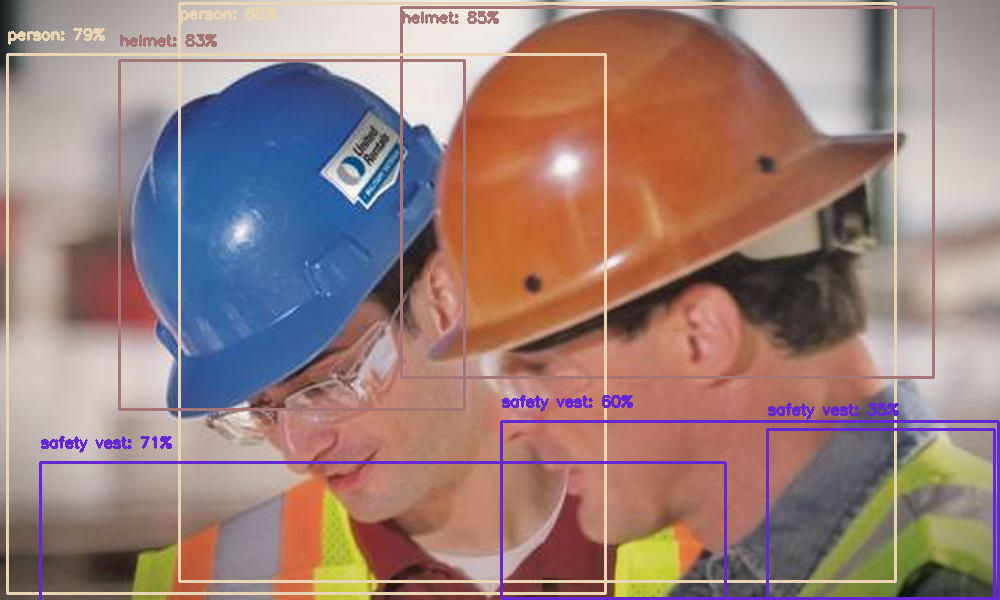

In [ ]:
INPUT_IMAGE = '/content/TFlite/full/test/images/pos_125.jpg'
DETECTION_THRESHOLD = 0.3

#This script will resize an image (somepic.jpg) using PIL (Python Imaging Library) to a width of 300 pixels and a height proportional to the new width. It does this by determining what percentage 300 pixels is of the original width (img.size[0]) and then multiplying the original height (img.size[1]) by that percentage. Change "basewidth" to any other number to change the default width of your images.
basewidth = 1000
img = Image.open(INPUT_IMAGE)
wpercent = (basewidth/float(img.size[0]))
hsize = int((float(img.size[1])*float(wpercent)))
img = img.resize((basewidth,hsize), Image.ANTIALIAS)
img.save('/content/TFlite/full/test/images/temp_resize.jpg')

temp_file = '/content/TFlite/full/test/images/temp_resize.jpg'

# Run inference and draw detection result on the local copy of the original file
detection_result_image, results = run_odt_and_draw_results(
    temp_file, 
    interpreter, 
    threshold=DETECTION_THRESHOLD
)

# Show the detection result
Image.fromarray(detection_result_image)

In [ ]:
# zipping my TFlite folder for use to download and do analysis on the images in another colab notebook
!zip -r /content/TFlite.zip /content/TFlite

  adding: content/TFlite/ (stored 0%)
  adding: content/TFlite/colab_models/ (stored 0%)
  adding: content/TFlite/colab_models/tflite4/ (stored 0%)
  adding: content/TFlite/colab_models/tflite4/model.tflite (deflated 27%)
  adding: content/TFlite/colab_models/tflite2/ (stored 0%)
  adding: content/TFlite/colab_models/tflite2/model.tflite (deflated 27%)
  adding: content/TFlite/colab_models/tflite1/ (stored 0%)
  adding: content/TFlite/colab_models/tflite1/saved_model/ (stored 0%)
  adding: content/TFlite/colab_models/tflite1/saved_model/assets/ (stored 0%)
  adding: content/TFlite/colab_models/tflite1/saved_model/variables/ (stored 0%)
  adding: content/TFlite/colab_models/tflite1/saved_model/variables/variables.data-00000-of-00001 (deflated 8%)
  adding: content/TFlite/colab_models/tflite1/saved_model/variables/variables.index (deflated 84%)
  adding: content/TFlite/colab_models/tflite1/saved_model/saved_model.pb (deflated 91%)
  adding: content/TFlite/colab_models/tflite1/labels.txt 